Name : Syed Waqar ali 

Seatno : B23108006022

Class : Second year Chemical Engieering 

Instructer : Mr. Fawad Alam

Course : CE 409 Computer Applcation and programming 


## 📌 What This Code Does
This code is used to predict pipe thickness loss based on various pipe properties such as material, grade, condition, diameter, and length. It uses a method called machine learning to find patterns in the data and estimate how much thickness a pipe may lose over time.

The main steps of the code include:

🗂️ Organizing and preparing the dataset for analysis

📊 Drawing graphs (like histograms and scatter plots) to better understand the data

🔢 Converting text columns (e.g., "Material" or "Condition") into numbers so the computer model can use them

🔀 Splitting the data into two parts: one for training and one for testing

🌲 Using a machine learning model called Random Forest Regressor to learn from the training data

🎯 Testing how well the model predicts pipe thickness loss using the test data

📌 Identifying which factors (such as material or diameter) are most important in predicting thickness reduction

This approach can help engineers make better decisions about pipeline materials, corrosion risks, and maintenance planning.

In [1]:
#import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib
matplotlib.use('Agg') 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import ml libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

sns.set(style='whitegrid', context='notebook')

In [10]:
df = pd.read_csv('/kaggle/input/predictive-maintenance-oil-and-gas-pipeline-data/market_pipe_thickness_loss_dataset.csv')


print('\nSummary Statistics:')
print(df.describe())


Summary Statistics:
       Pipe_Size_mm  Thickness_mm  Max_Pressure_psi  Temperature_C  \
count   1000.000000   1000.000000       1000.000000    1000.000000   
mean     522.000000     16.073530       1004.100000      42.595600   
std      443.703587     10.548358        812.843099      41.127071   
min       50.000000      3.000000        150.000000     -50.000000   
25%      150.000000      7.357500        300.000000      13.400000   
50%      300.000000     12.930000        900.000000      41.200000   
75%      800.000000     23.027500       1500.000000      69.150000   
max     1500.000000     49.530000       2500.000000     149.700000   

       Corrosion_Impact_Percent  Thickness_Loss_mm  Material_Loss_Percent  \
count               1000.000000        1000.000000            1000.000000   
mean                   9.745990           4.886300              46.747560   
std                    5.817492           2.901123              46.602553   
min                    0.000000         

## 🔍 Exploratory Data Analysis
In this step, we explore the dataset to better understand its structure. We use visualizations to examine the distributions of numerical variables (like diameter and thickness) and count how often different categorical values (such as material types or pipe conditions) appear. This helps us identify useful patterns or trends that may impact pipeline performance and maintenance.

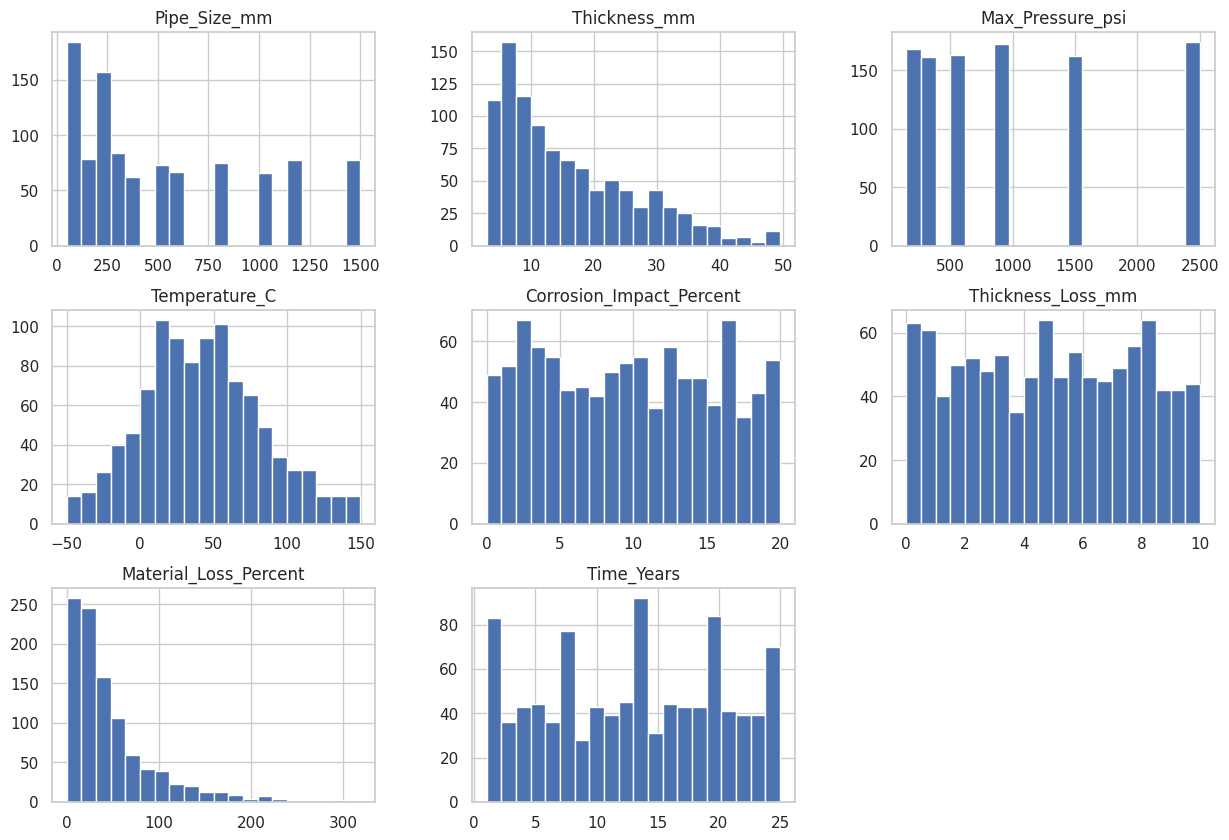

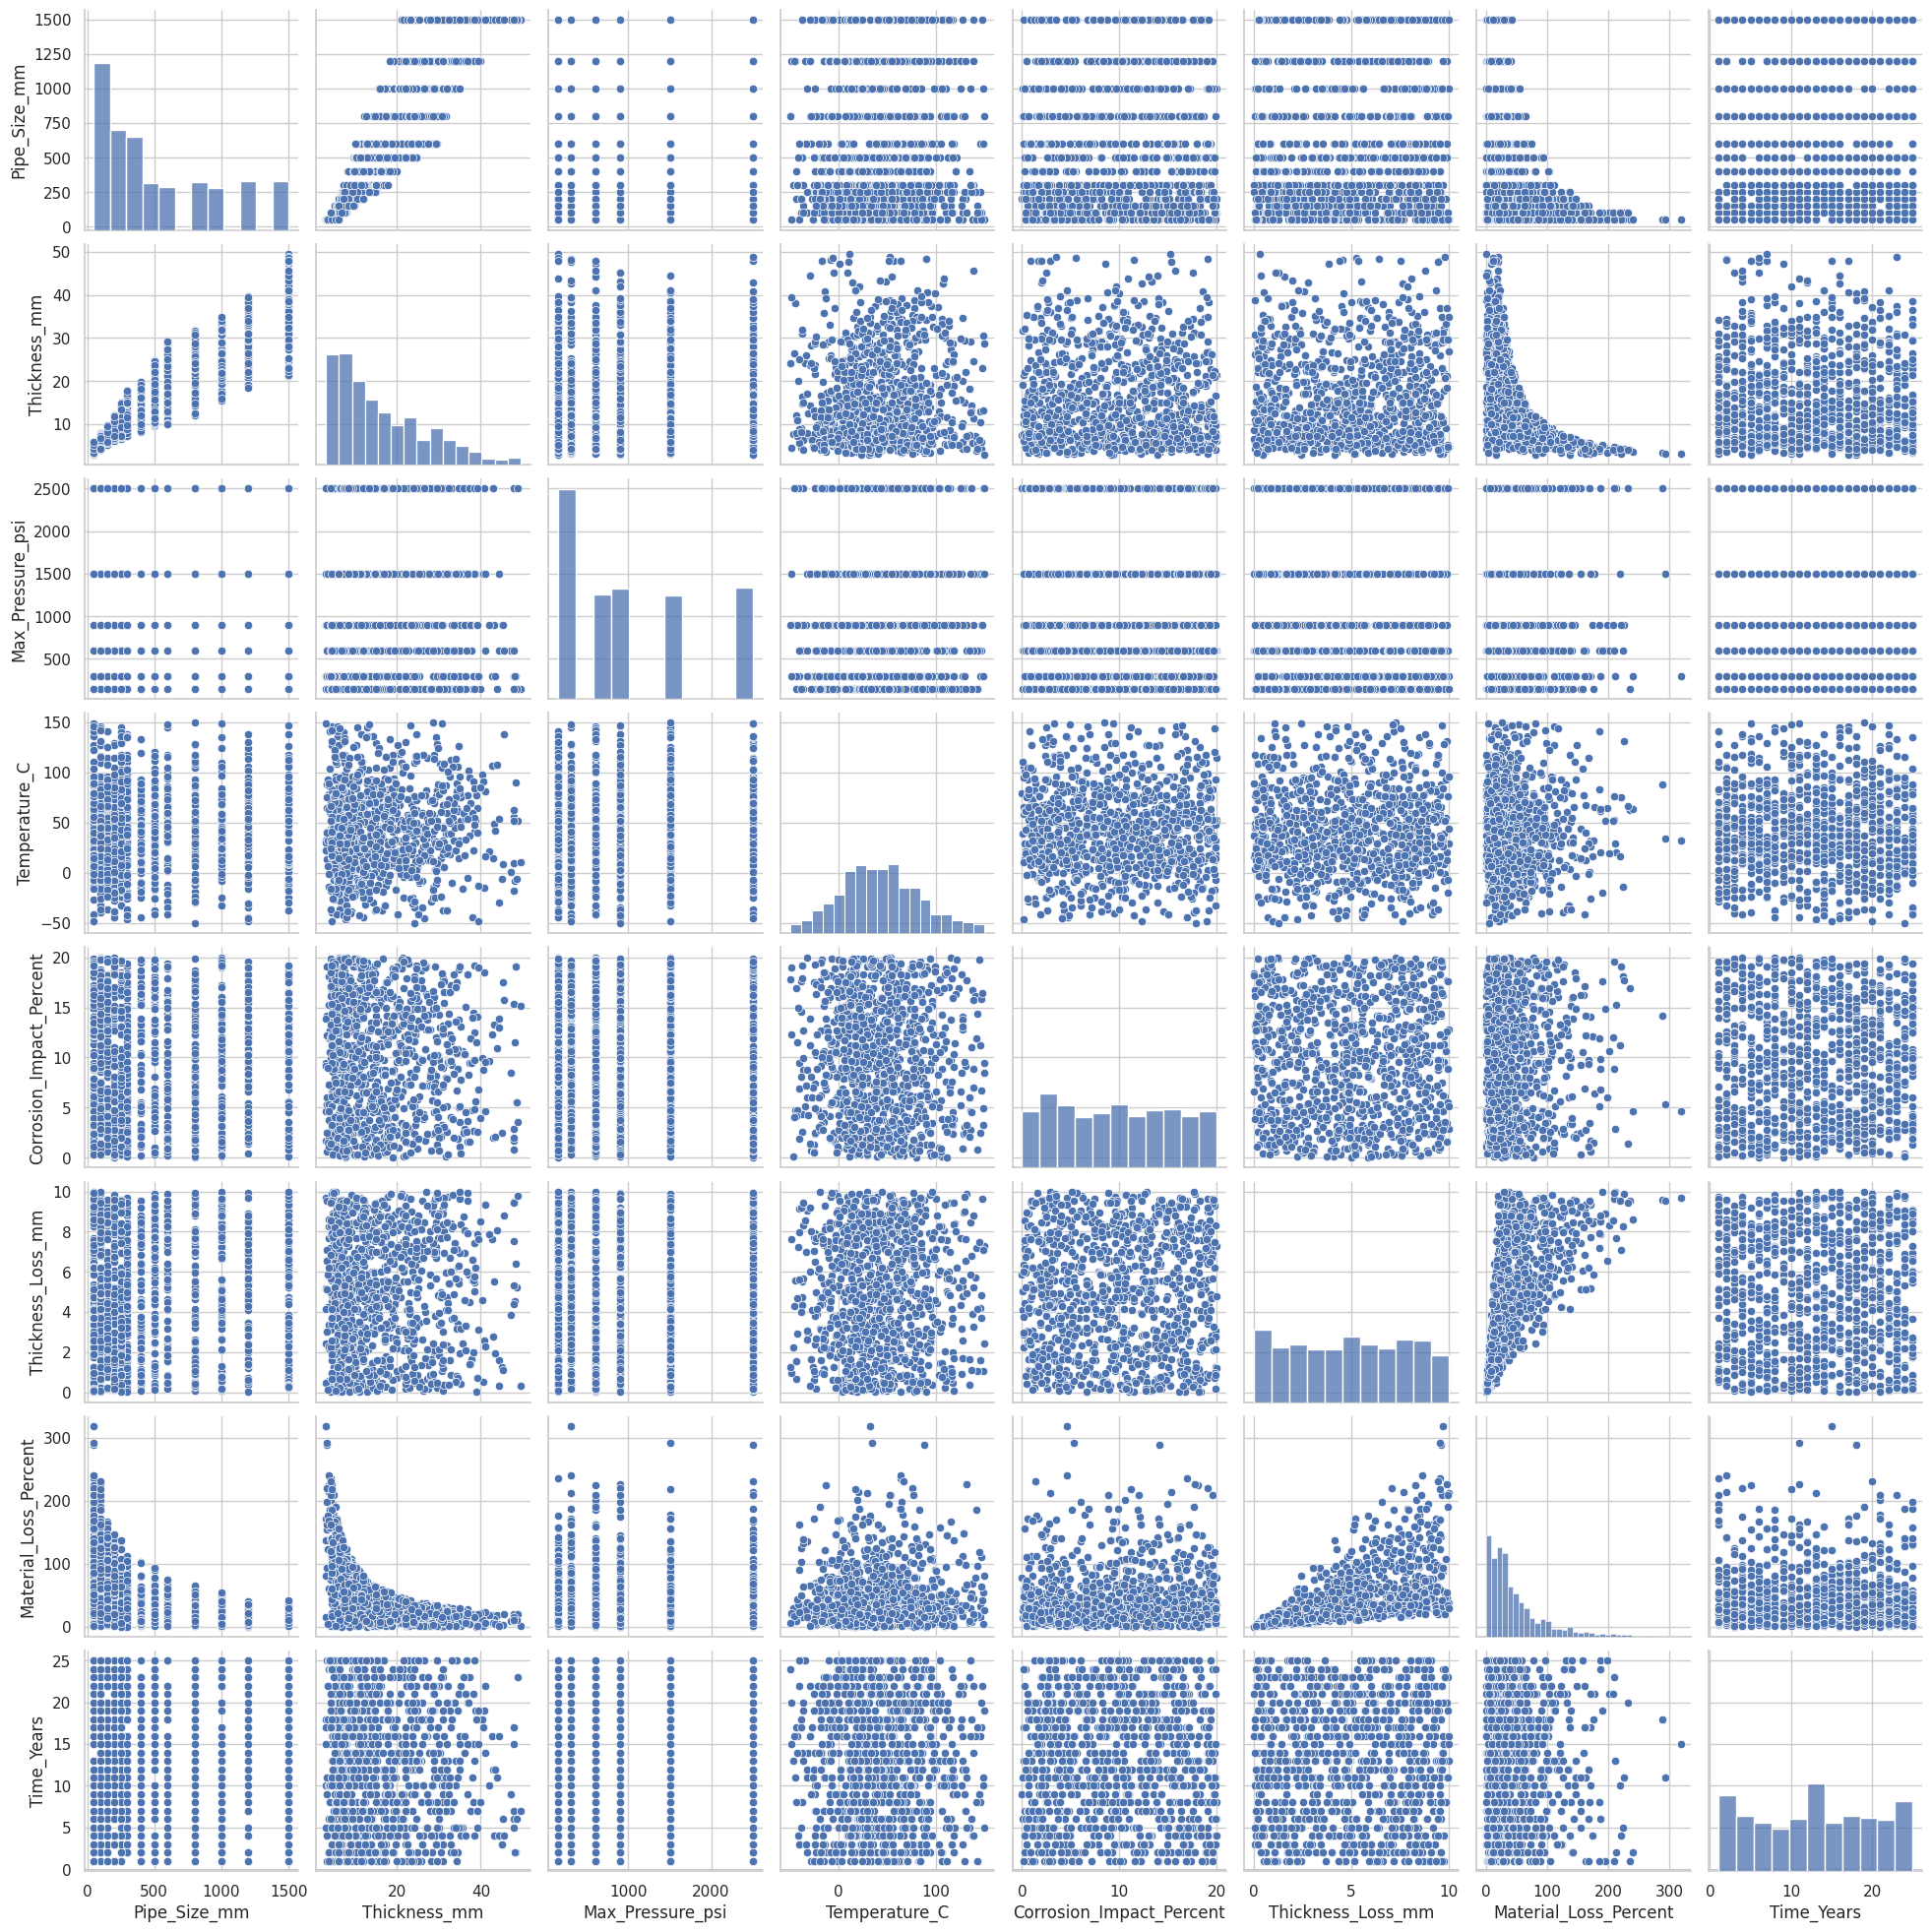

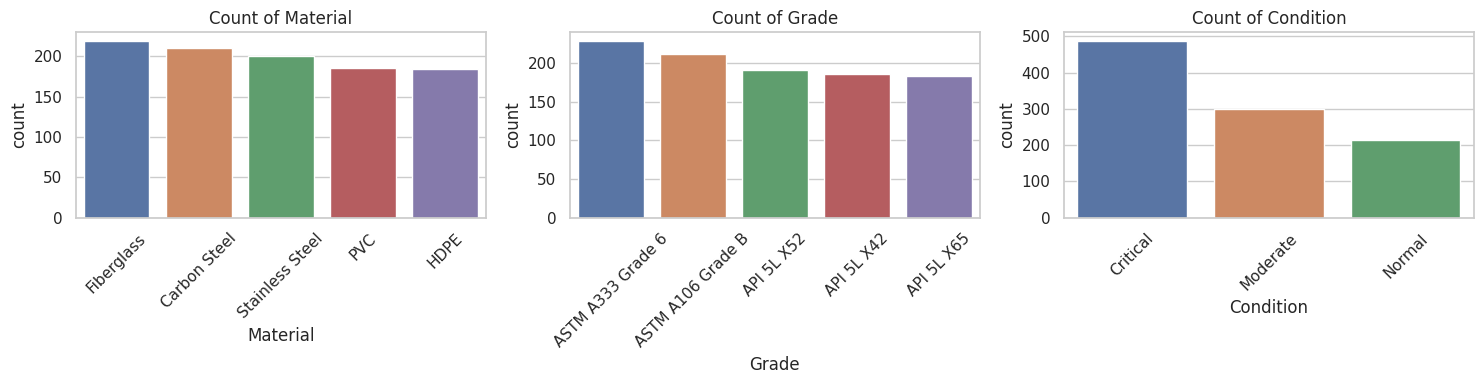

In [13]:
# Histograms for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_columns].hist(bins=20, figsize=(15,10));

# Create scatter plots between all numeric features to visually explore relationships and patterns
sns.pairplot(df[numeric_columns]);
plt.show()

# Count plots for categorical variables
categorical_columns = ['Material', 'Grade', 'Condition']
plt.figure(figsize=(15,4))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
plt.tight_layout();
plt.show()

## 📈 Predictor Creation 
To forecast pipeline thickness loss, we construct a regression model using Thickness_Loss_mm as the target variable and the remaining features (such as Pipeline Age, diameter, temperature, wall thickness etc.) as inputs.

A Random Forest Regressor is used in this case. The dataset is divided into training and testing sets to evaluate how well the model performs on unseen data.

The model's prediction performance is then measured using the R² score, which indicates how closely the predicted values align with the actual thickness loss values.

In [65]:
# Prepare data for prediction

# Our prediction target variable is 'Thickness_Loss_mm'
target = 'Thickness_Loss_mm'

# We are using only the input features that would be available before the inspection. 
# Columns like final condition or damage results are excluded. 
# Categorical columns are converted into numbers using one-hot encoding.

exclude_columns = [
           target,                 # Target itself
          'Material_Loss_Percent',              
          'Corrosion_Impact_Percent',       # likely post-observation
]

# Automatically select features by excluding these
features = df.drop(columns=[col for col in exclude_columns if col in df.columns])



# Turn text columns (like Material or Grade) into numbers so the model can understand them
features = pd.get_dummies(features, drop_first=True)

#print(features)

# Define X and y
X = features
y = df[target]

# Split the data into 80% for training and 20% for testing to check model accuracy
# X_train  →  80% of input features used to train the model
# y_train  →  80% of target values (Thickness Loss) for training
# X_test   →  20% of input features used to test the model
# y_test   →  20% of target values for evaluating model accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model using R² score
score = r2_score(y_test, y_pred)
print(f'R² Score of the Random Forest Regressor: {score:.2f} ')

#print(y_pred)

R² Score of the Random Forest Regressor: 0.84 


## 📌 Forecasting Thickness Loss
To estimate the future thickness loss of a pipeline under specific operating conditions, we allow users to input custom attributes such as pipe diameter, pressure, material type, and more. These attributes are then processed using the same format as the training data.

The trained machine learning model uses these inputs to forecast the expected thickness loss in millimeters. This approach can assist in predictive maintenance, helping engineers make informed decisions before physical inspection or damage occurs.

This forecasting method supports operational planning by providing early warning signs of degradation, potentially reducing downtime and improving pipeline safety

In [64]:
# Define the same columns our model was trained on
input_data = {
    'Pipe_Size_mm': 800,
    'Thickness_mm': 15.48,
    'Max_Pressure_psi': 300,
    'Temperature_C': 84.9,  
    'Time_Years': 2 ,              #  prediction of thickness loss after 5 years
    'Grade': 'ASTM A333 Grade 6',    # Categorical
    'Material': 'Carbon Steel',      # Categorical
    'Condition':'Moderate'        # operational workload - Categorical
}

# Convert input to DataFrame
custom_df = pd.DataFrame([input_data])

condition_val = custom_df.at[0, 'Condition']
material_val = custom_df.at[0, 'Material']
grade_val = custom_df.at[0, 'Grade']

# Step 2: Drop original categorical columns
custom_df = custom_df.drop(columns=['Condition', 'Material', 'Grade'])

# Step 3: Add one-hot columns manually (replace with exact names used during training)
custom_df[f'Condition_{condition_val}'] = True
custom_df[f'Material_{material_val}'] = True
custom_df[f'Grade_{grade_val}'] = True

custom_encoded = pd.get_dummies(custom_df, drop_first=True)

# Match column order with training features (add missing ones if needed)

for col in X.columns:
    if col not in custom_encoded.columns:
        custom_encoded[col] = 0  # Add missing columns as 0

# Reorder to match training data
custom_encoded = custom_encoded[X.columns]


# Predict thickness loss
predicted_loss = rf_regressor.predict(custom_encoded)[0]

# Define a threshold to decide if the pipe is "durable"
durability_threshold = 1.0  # You can change this based on domain knowledge

# Output result
if predicted_loss <= durability_threshold:
    print(f"✅ Predicted Thickness Loss: {predicted_loss:.2f} mm → Pipe is likely durable.")
else:
    print(f"⚠️ Predicted Thickness Loss: {predicted_loss:.2f} mm → Pipe may NOT be durable.")


⚠️ Predicted Thickness Loss: 4.58 mm → Pipe may NOT be durable.


## 📊 Feature Importance



Feature Importance Plot highlights which pipe characteristics (like operational workload [condition], thickness, material, diameter, etc.) were most useful in predicting thickness loss.

R² Score of the Random Forest Regressor: 0.84 


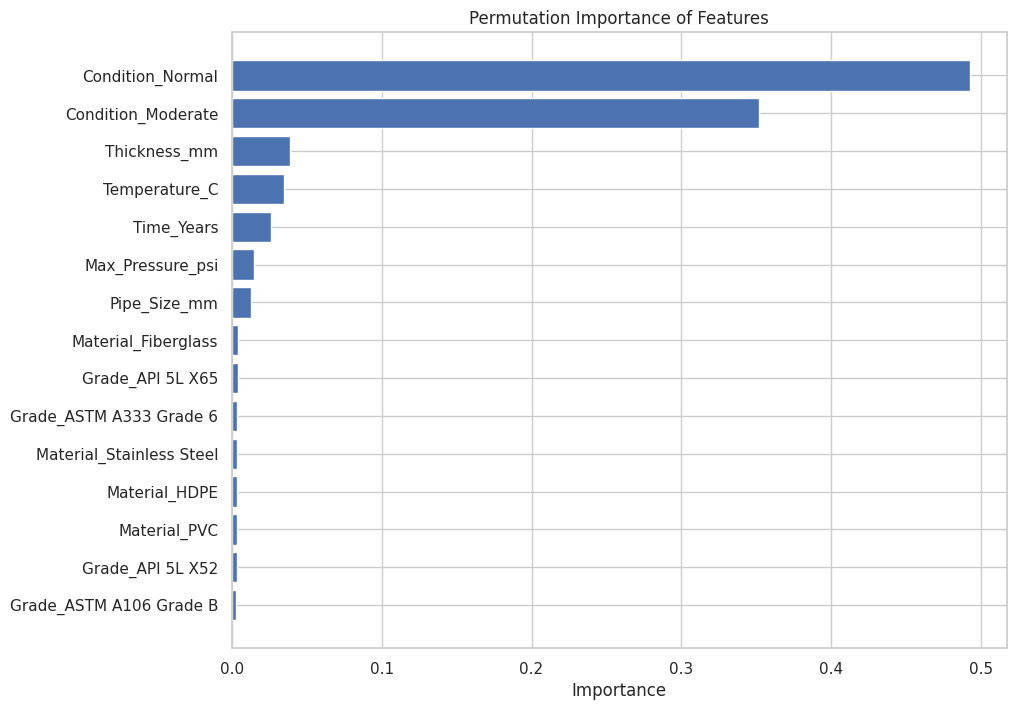

In [21]:
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Permutation Importance of Features')
plt.xlabel('Importance')
plt.show()

## 📌 Conclusion

This dataset provides valuable insights into factors contributing to pipe thickness loss. By analyzing variables such as material, grade, condition, and dimensions, we can train a predictive model to estimate future thickness degradation. This can aid in pipeline maintenance planning, reduce failure risks, and support better material selection for chemical or industrial applications. The Random Forest Regressor delivered a respectable R² score, suggesting that features such as pipe size, temperature, and corrosion impact are valuable indicators of thickness loss.